___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Lab - 2 (CNN) <br><br>Assignment-2 Solution<br><br>Image Classification with CNN<br><h1>


# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [9]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [10]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [11]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [12]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [13]:
X_train[0].shape

(28, 28)

In [14]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

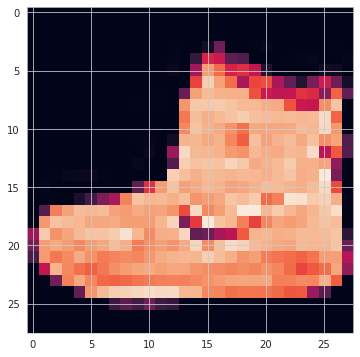

In [15]:
plt.imshow(X_train[0])

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
y_train[0]

9

In [18]:
classes[9]

'Ankle boot'

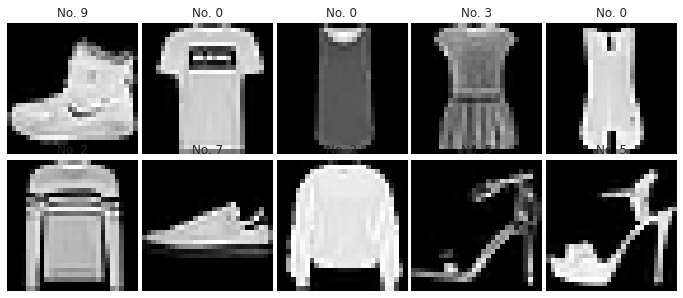

In [19]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [20]:
X_train.min()

0

In [21]:
X_train.max()

255

In [22]:
X_train = X_train/255
X_test = X_test/255

In [23]:
X_train.min()

0.0

In [24]:
X_train.max()

1.0

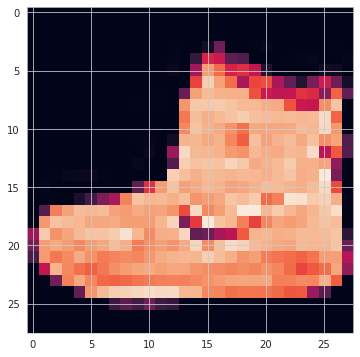

In [25]:
plt.imshow(X_train[0])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [28]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [29]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
y_train.shape

(60000,)

In [33]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [34]:
y_train[8]

5

In [35]:
Y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create The Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (3,3) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [37]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 256)               1211648   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [39]:
((3* 3 * 1) + 1) * 28

280

## Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [42]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 19s 4ms/step - loss: 0.4198 - accuracy: 0.8523 - val_loss: 0.3182 - val_accuracy: 0.8876
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3020 - accuracy: 0.8940 - val_loss: 0.3057 - val_accuracy: 0.8901
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2823 - accuracy: 0.9020 - val_loss: 0.2978 - val_accuracy: 0.8954
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2743 - accuracy: 0.9055 - val_loss: 0.2874 - val_accuracy: 0.8997
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2709 - accuracy: 0.9067 - val_loss: 0.2968 - val_accuracy: 0.8999
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2710 - accuracy: 0.9075 - val_loss: 0.3087 - val_accuracy: 0.8984
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2667 - accuracy: 0.9088 - val_loss: 0.2929 - val_accuracy

**TASK 7: Plot values of metrics you used in your model.**

In [43]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

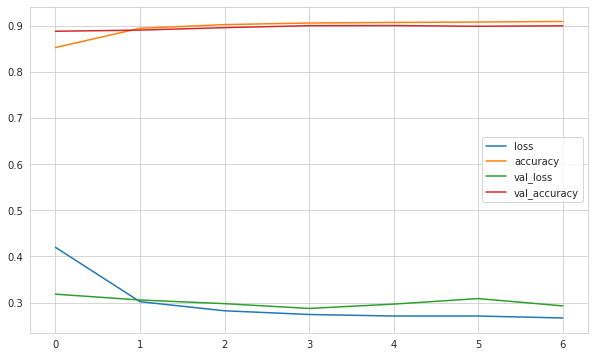

In [45]:
summary.plot();

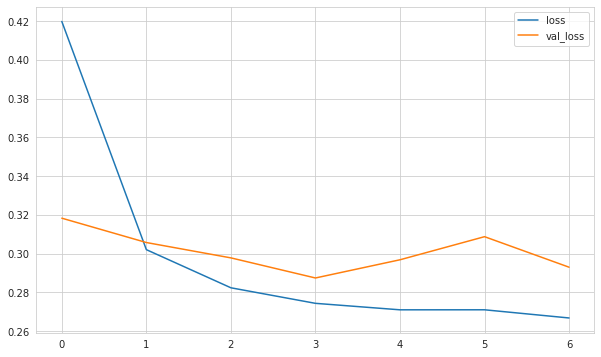

In [46]:
summary[["loss", "val_loss"]].plot();

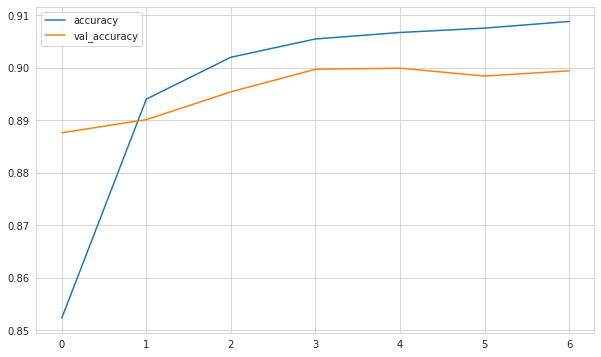

In [47]:
summary[["accuracy", "val_accuracy"]].plot();

In [48]:
model2 = Sequential()
model2.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model2.add(MaxPool2D(pool_size=(3, 3),strides=(1, 1)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [49]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16128)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2064512   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [50]:
model2.fit(X_train, Y_train, batch_size=32, epochs=15, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4401 - accuracy: 0.8491 - val_loss: 0.3302 - val_accuracy: 0.8845
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3291 - accuracy: 0.8884 - val_loss: 0.3102 - val_accuracy: 0.8929
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3121 - accuracy: 0.8946 - val_loss: 0.3035 - val_accuracy: 0.8994
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3091 - accuracy: 0.8971 - val_loss: 0.3132 - val_accuracy: 0.8949
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3083 - accuracy: 0.8979 - val_loss: 0.3066 - val_accuracy: 0.8958
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3041 - accuracy: 0.8989 - val_loss: 0.3127 - val_accuracy: 0.8979


In [51]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.440,0.849,0.330,0.885
1,0.329,0.888,0.310,0.893
2,0.312,0.895,0.303,0.899
3,0.309,0.897,0.313,0.895
4,0.308,0.898,0.307,0.896


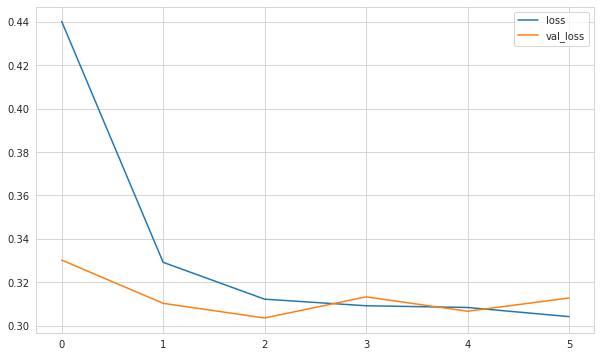

In [52]:
summary[["loss", "val_loss"]].plot();

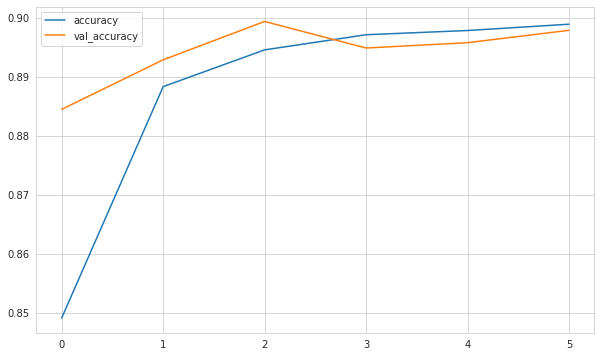

In [53]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2874 - accuracy: 0.8997


[0.2873808741569519, 0.8996999859809875]

In [56]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3035 - accuracy: 0.8994


[0.3034838140010834, 0.899399995803833]

In [57]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3034838140010834
Test accuracy: 0.899399995803833


In [58]:
pred_prob = model2.predict(X_test)
pred_prob

array([[6.9359123e-09, 3.8182058e-10, 9.3913566e-10, ..., 5.8958267e-05,
        8.7040729e-07, 9.9990761e-01],
       [7.2936240e-07, 2.0453247e-14, 9.9999893e-01, ..., 3.1786235e-13,
        5.8024341e-10, 2.5992531e-11],
       [1.0541799e-11, 1.0000000e+00, 9.8639058e-17, ..., 3.7132184e-19,
        8.8729452e-14, 3.2079537e-17],
       ...,
       [1.0289681e-07, 1.0698054e-13, 3.5350778e-10, ..., 4.9638224e-11,
        9.9999940e-01, 2.5657742e-11],
       [5.5874794e-10, 1.0000000e+00, 2.1622085e-14, ..., 3.4144351e-15,
        2.0007490e-11, 1.6157177e-13],
       [4.7642617e-03, 1.1923587e-03, 9.3747601e-03, ..., 2.3553059e-01,
        9.6339062e-02, 4.4627186e-02]], dtype=float32)

In [59]:
pred_prob.shape

(10000, 10)

In [60]:
pred_prob[0]

array([6.9359123e-09, 3.8182058e-10, 9.3913566e-10, 7.6302564e-10,
       4.9025051e-10, 3.2506730e-05, 1.4733964e-08, 5.8958267e-05,
       8.7040729e-07, 9.9990761e-01], dtype=float32)

In [61]:
np.argmax(pred_prob[0])

9

In [62]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [63]:
y_pred.shape

(10000,)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.83      0.84      1000
           3       0.88      0.92      0.90      1000
           4       0.81      0.86      0.84      1000
           5       0.98      0.97      0.98      1000
           6       0.74      0.69      0.71      1000
           7       0.95      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [65]:
print(confusion_matrix(y_test, y_pred))

[[848   1  15  20   5   2 106   0   3   0]
 [  1 973   1  20   2   0   1   0   2   0]
 [  8   2 827   9  83   0  70   0   1   0]
 [ 19   5   8 923  15   0  28   0   2   0]
 [  1   3  50  46 860   0  39   0   1   0]
 [  0   0   0   0   0 969   0  21   0  10]
 [128   1  61  27  86   0 686   0  11   0]
 [  0   0   0   0   0   7   0 965   1  27]
 [  1   1   1   4   5   2   3   4 979   0]
 [  0   0   0   0   0   4   0  31   1 964]]


In [66]:
(y_test != y_pred).sum()

1006

## Prediction

In [67]:
samples=[X_test[5], X_test[10], X_test[15]]

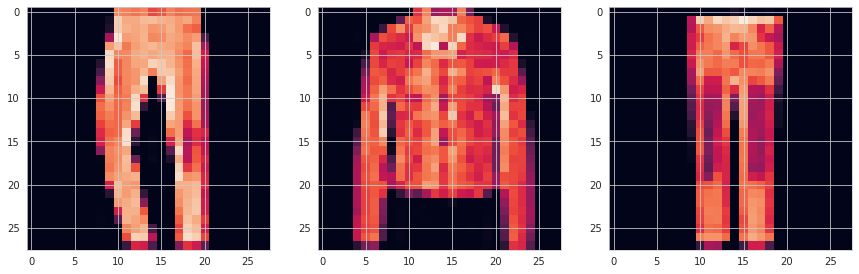

In [68]:
plt.figure(figsize = (20,5))
index=1
for i in samples:
    plt.subplot(1,4,index)
    plt.imshow(i.reshape(28,28))
    index += 1

In [69]:
samples = np.array(samples)
samples

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [70]:
samples.shape

(3, 28, 28, 1)

In [71]:
pred_prob = model2.predict(samples)
pred_prob

array([[4.2414086e-10, 1.0000000e+00, 2.9644554e-14, 7.1710793e-12,
        4.9850071e-13, 4.5730889e-12, 5.0578556e-12, 4.1265013e-17,
        1.5426422e-11, 7.8687270e-16],
       [1.0780428e-04, 1.1985805e-05, 1.1611217e-02, 8.7153448e-06,
        9.6446955e-01, 4.7322976e-07, 2.3754423e-02, 1.4836906e-08,
        3.2358530e-05, 3.4403765e-06],
       [8.4450454e-07, 9.9999475e-01, 1.2196876e-09, 4.0985860e-06,
        1.0804360e-07, 5.3829718e-09, 1.9318620e-07, 6.7364447e-11,
        5.0407454e-08, 1.0740654e-09]], dtype=float32)

In [72]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([1, 4, 1])

In [73]:
y_test[5:16:5]

array([1, 4, 1], dtype=uint8)

In [74]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [75]:
for i in y_test[5:16:5]:
    print(classes[i])

Trouser
Coat
Trouser


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___